# **ETHICS PROJECT**
## **Fairness in Recruitment Algorithms**

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Task 1 - Preparation**
##### **1.1 Import utils**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lime import lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import shap
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.datasets import BinaryLabelDataset
import tensorflow.compat.v1 as tf
import os

import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from tensorflow.compat.v1.keras.backend import get_session
from tensorflow.keras.layers import Dense, BatchNormalization
#tf.compat.v1.disable_v2_behavior()



random_seed = 15

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


##### **1.2 Encode the dataset**

In [3]:
#dataset_path = '/content/drive/MyDrive/Dataset_1.0_Akkodis.xlsx'
dataset_path = 'Dataset_1.0_Akkodis.xlsx'
df = pd.read_excel(dataset_path)
df.head()

,Unnamed: 0,ID,Candidate State,Age Range,Citizenship,Residence,Sex,Protected category,TAG,Study area,...,Akkodis headquarters,Current Ral,Expected Ral,Technical Skills,Standing/Position,Comunication,Maturity,Dynamism,Mobility,English
0,0,71470,Hired,31 - 35 years,Pakistani,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,71470,Hired,31 - 35 years,Pakistani,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,71470,Hired,31 - 35 years,Pakistani,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,71470,Hired,31 - 35 years,Pakistani,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,...,Modena,22-24 K,24-26 K,2.0,2.0,1.0,2.0,2.0,3.0,3.0
4,4,71470,Hired,31 - 35 years,Pakistani,TURIN » Turin ~ Piedmont,Male,NaN,"AUTOSAR, CAN, C, C++, MATLAB/SIMULINK, VECTOR/...",Automation/Mechatronics Engineering,...,Modena,22-24 K,24-26 K,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Visualize the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 21377 rows and 41 columns


In [5]:
# Get some statistics
def get_data(dataframe):
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 100)
    print("NULL Values Check")
    print(dataframe.isnull().sum())
    print("=" * 100)

In [6]:
# Drop non-useful columns
unuseful_columns = ['ID', ' TAG', ' Year of insertion', ' Year of Recruitment', ' Recruitment Request',
                     ' Assumption Headquarters', ' event_type__val', ' linked_search__key', ' Job Description',
                       ' Candidate Profile', ' Akkodis headquarters', 'Standing/Position', 'Unnamed: 0', ' Residence', ' Last Role', ' Study Area.1', ' Years Experience.1']
df = df.drop(columns=unuseful_columns)

In [7]:
get_data(df)


BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21377 entries, 0 to 21376
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0    Candidate State     21377 non-null  object 
 1    Age Range           21377 non-null  object 
 2    Citizenship         21361 non-null  object 
 3    Sex                 21377 non-null  object 
 4    Protected category  85 non-null     object 
 5    Study area          21332 non-null  object 
 6    Study Title         21377 non-null  object 
 7    Years Experience    21377 non-null  object 
 8    Sector              12214 non-null  object 
 9    Job Family Hiring   2382 non-null   object 
 10   Job Title Hiring    2382 non-null   object 
 11   event_feedback      5846 non-null   object 
 12   Overall             5984 non-null   object 
 13   Minimum Ral         1169 non-null   object 
 14   Ral Maximum         1528 non-null   object 
 15   Study Level    

In [8]:
# Visualize the new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 21377 rows and 24 columns


In [9]:
# Visualize the possible values
for feature in df.columns:
    print(f'Feature: {feature} -- {list(df[feature].unique())}')

Feature:  Candidate State -- ['Hired', 'Vivier', 'QM', 'In selection', 'First contact', 'Economic proposal', 'Imported']
Feature:  Age Range -- ['31 - 35 years', '40 - 45 years', '36 - 40 years', '> 45 years', '26 - 30 years', '< 20 years', '20 - 25 years']
Feature:  Citizenship -- ['Pakistani', 'Italian', nan, 'Moroccan', 'Iranian', 'Albanian', 'Indiana', 'Colombian', 'Ethiopian', 'Romanian', 'Vltava', 'Lebanese', 'Spanish', 'Egyptian', 'Russian', 'Tunisian', 'Turkish', 'Chinese', 'Uzbek', 'Brazilian', 'Cameroonian', 'Sudanese', 'Algerian', 'Croatian', 'Polish', 'Indonesian', 'San Marino', 'Argentina', 'Azerbaijan', 'Portuguese', 'Serbian', 'French', 'Swiss', 'German', 'Peruvian', 'British', 'Venezuelan', 'Rwandan', 'Costa Rican', 'South Korean', 'Ukraine', 'Macedonian', 'Nigerian', 'American', 'Kenyan', 'Emirati', 'Ecuadorian', 'Ivorian', 'Mexican', 'Chilean', 'Japanese', 'Syrian', 'Bangladeshis', 'Greek', 'Israeli', 'Omani', 'South African', 'Bolivian', 'Filipina', 'Sinhalese', 'Pal

##### **1.3 Handle the NANs**

In [10]:
columns_with_nan = df.columns[df.isnull().any()].tolist()
print(columns_with_nan)

[' Citizenship', ' Protected category', ' Study area', ' Sector', ' Job Family Hiring', ' Job Title Hiring', ' event_feedback', ' Overall', ' Minimum Ral', ' Ral Maximum', ' Study Level', 'Current Ral', 'Expected Ral', 'Technical Skills', 'Comunication', 'Maturity', 'Dynamism', 'Mobility', 'English']


In [11]:
# Handle NaNs
df[' Citizenship'] = df[' Citizenship'].fillna('Not Specified')

df[' Protected category'] = df[' Protected category'].fillna('Not a protected category')
df[' Protected category'] = df[' Protected category'].replace('Article 18', 'Article 1')

df[' Study area'] = df[' Study area'].fillna('Not Specified')
df[' Sector'] = df[' Sector'].fillna('Unemployed')
df[' Job Family Hiring'] = df[' Job Family Hiring'].fillna('Not Specified')
df[' Job Title Hiring'] = df[' Job Title Hiring'].fillna('Not Specified')
df[' event_feedback'] = df[' event_feedback'].fillna('Not Specified')
df[' Overall'] = df[' Overall'].fillna('Not Specified')
df[' Minimum Ral'] = df[' Minimum Ral'].fillna('Not Specified')
df[' Ral Maximum'] = df[' Ral Maximum'].fillna('Not Specified')
df[' Study Level'] = df[' Study Level'].fillna('Not Specified')
df['Current Ral'] = df['Current Ral'].fillna('Not Specified')
df['Expected Ral'] = df['Expected Ral'].fillna('Not Specified')
df['Technical Skills'] = df['Technical Skills'].fillna(df['Technical Skills'].mean())
df['Comunication'] = df['Comunication'].fillna(df['Comunication'].mean())
df['Maturity'] = df['Maturity'].fillna(df['Maturity'].mean())
df['Dynamism'] = df['Dynamism'].fillna(df['Dynamism'].mean())
df['Mobility'] = df['Mobility'].fillna(df['Mobility'].mean())
df['English'] = df['English'].fillna(df['English'].mean())

In [12]:
# check
print(f'There are {df.isnull().sum().sum()} NANs')

There are 0 NANs


In [13]:
df.head()

,Candidate State,Age Range,Citizenship,Sex,Protected category,Study area,Study Title,Years Experience,Sector,Job Family Hiring,...,Ral Maximum,Study Level,Current Ral,Expected Ral,Technical Skills,Comunication,Maturity,Dynamism,Mobility,English
0,Hired,31 - 35 years,Pakistani,Male,Not a protected category,Automation/Mechatronics Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973
1,Hired,31 - 35 years,Pakistani,Male,Not a protected category,Automation/Mechatronics Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973
2,Hired,31 - 35 years,Pakistani,Male,Not a protected category,Automation/Mechatronics Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973
3,Hired,31 - 35 years,Pakistani,Male,Not a protected category,Automation/Mechatronics Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.000000,1.00000,2.000000,2.00000,3.000000,3.000000
4,Hired,31 - 35 years,Pakistani,Male,Not a protected category,Automation/Mechatronics Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973


##### **1.4 Work on the features**

In [14]:
for feature in df.columns:
    print(f'Feature: {feature} -- {list(df[feature].unique())}')

Feature:  Candidate State -- ['Hired', 'Vivier', 'QM', 'In selection', 'First contact', 'Economic proposal', 'Imported']
Feature:  Age Range -- ['31 - 35 years', '40 - 45 years', '36 - 40 years', '> 45 years', '26 - 30 years', '< 20 years', '20 - 25 years']
Feature:  Citizenship -- ['Pakistani', 'Italian', 'Not Specified', 'Moroccan', 'Iranian', 'Albanian', 'Indiana', 'Colombian', 'Ethiopian', 'Romanian', 'Vltava', 'Lebanese', 'Spanish', 'Egyptian', 'Russian', 'Tunisian', 'Turkish', 'Chinese', 'Uzbek', 'Brazilian', 'Cameroonian', 'Sudanese', 'Algerian', 'Croatian', 'Polish', 'Indonesian', 'San Marino', 'Argentina', 'Azerbaijan', 'Portuguese', 'Serbian', 'French', 'Swiss', 'German', 'Peruvian', 'British', 'Venezuelan', 'Rwandan', 'Costa Rican', 'South Korean', 'Ukraine', 'Macedonian', 'Nigerian', 'American', 'Kenyan', 'Emirati', 'Ecuadorian', 'Ivorian', 'Mexican', 'Chilean', 'Japanese', 'Syrian', 'Bangladeshis', 'Greek', 'Israeli', 'Omani', 'South African', 'Bolivian', 'Filipina', 'Sinh

In [15]:
citizenship_mapping = {
    'Pakistani' : 'Non-European',
    'Italian' : 'European',
    'Not Specified' : 'Non-European',
    'Moroccan' : 'Non-European',
    'Iranian' : 'Non-European',
    'Albanian' : 'European',
    'Indiana' : 'Non-European',
    'Colombian' : 'Non-European',
    'Ethiopian' : 'Non-European',
    'Romanian' : 'European',
    'Vltava' : 'European',
    'Lebanese' : 'Non-European',
    'Spanish' : 'European',
    'Egyptian' : 'Non-European',
    'Russian' : 'European',
    'Tunisian' : 'Non-European',
    'Turkish' : 'European',
    'Chinese' : 'Non-European',
    'Uzbek' : 'Non-European',
    'Brazilian' : 'Non-European',
    'Cameroonian' : 'Non-European',
    'Sudanese' : 'Non-European',
    'Algerian' : 'Non-European',
    'Croatian' : 'European',
    'Polish' : 'European',
    'Indonesian' : 'Non-European',
    'San Marino' : 'European',
    'Argentina' : 'Non-European',
    'Azerbaijan' : 'Non-European',
    'Portuguese' : 'European',
    'Serbian' : 'European',
    'French' : 'European',
    'Swiss' : 'European',
    'German' : 'European',
    'Peruvian' : 'Non-European',
    'British' : 'European',
    'Venezuelan' : 'Non-European',
    'Rwandan' : 'Non-European',
    'Costa Rican' : 'Non-European',
    'South Korean' : 'Non-European',
    'Ukraine' : 'European',
    'Macedonian' : 'European',
    'Nigerian' : 'Non-European',
    'American' : 'Non-European',
    'Kenyan' : 'Non-European',
    'Emirati' : 'Non-European',
    'Ecuadorian' : 'Non-European',
    'Ivorian' : 'Non-European',
    'Mexican' : 'Non-European',
    'Chilean' : 'Non-European',
    'Japanese' : 'Non-European',
    'Syrian' : 'Non-European',
    'Bangladeshis' : 'Non-European',
    'Greek' : 'European',
    'Israeli' : 'Non-European',
    'Omani' : 'Non-European',
    'South African' : 'Non-European',
    'Bolivian' : 'Non-European',
    'Filipina' : 'Non-European',
    'Sinhalese' : 'Non-European',
    'Palestinian (Palestinian Territories)' : 'Non-European',
    'Afghan' : 'Non-European',
    'Jordan' : 'Non-European',
    'Cuban' : 'Non-European',
    'Vietnamese' : 'Non-European',
    'Latvian' : 'European',
    'Libyan' : 'Non-European',
    'Bulgarian' : 'European',
    'Togolese' : 'Non-European',
    'Kazakh' : 'Non-European',
    'Austrian' : 'European',
    'Belarusian' : 'European',
    'Saudi' : 'Non-European',
    'Bosnian' : 'European',
    'Kyrgyz' : 'Non-European',
    'Tajik' : 'Non-European',
    'Dutch' : 'European',
    'Qatari' : 'Non-European',
    'Georgian' : 'European',
    'Canadian' : 'Non-European',
    'Australian' : 'Non-European',
    'Salvadoran' : 'Non-European',
    'Congolese' : 'Non-European',
    'Guatemalan' : 'Non-European',
    'Hungarian' : 'European',
    'Tanzanian' : 'Non-European',
    'Gabonese' : 'Non-European',
    'Angolan' : 'Non-European',
    'Maltese' : 'European'
}


study_area_mapping = {
    'Automation/Mechatronics Engineering' : 'Engineering',
    'computer engineering' : 'Engineering',
    'chemical engineering' : 'Engineering',
    'Legal' : 'Law',
    'Mechanical engineering' : 'Engineering',
    'Telecommunications Engineering' : 'Engineering',
    'Economic - Statistics' : 'Economic',
    'Psychology' : 'Scientific Field',
    'Materials Science and Engineering' : 'Engineering',
    'Other scientific subjects' : 'Scientific Field',
    'Biomedical Engineering' : 'Engineering',
    'electronic Engineering' : 'Engineering',
    'Information Engineering' : 'Engineering',
    'Aeronautical/Aerospace/Astronautics Engineering' : 'Engineering',
    'Energy and Nuclear Engineering' : 'Engineering',
    'Informatics' : 'Informatics',
    'Management Engineering' : 'Engineering',
    'Automotive Engineering' : 'Engineering',
    'industrial engineering' : 'Engineering',
    'Other' : 'Other',
    'Surveyor' : 'NO COLLEGE',
    'Civil/Civil and Environmental Engineering' : 'Engineering',
    'Electrical Engineering' : 'Engineering',
    'Scientific maturity' : 'NO COLLEGE',
    'Chemist - Pharmaceutical' : 'Medical Field',
    'Political-Social' : 'Other Humanities Subjects',
    'Other humanities subjects' : 'Other Humanities Subjects',
    'Geo-Biological' : 'Scientific Field',
    'Linguistics' : 'Linguistics',
    'Agriculture and veterinary' : 'Scientific Field',
    'Literary' : 'Other Humanities Subjects',
    'Humanistic high school diploma' : 'NO COLLEGE',
    'Accounting' : 'NO COLLEGE',
    'Communication Sciences' : 'Other Humanities Subjects',
    'Safety Engineering' : 'Engineering',
    'Architecture' : 'Scientific Field',
    'Mathematics' : 'Scientific Field',
    'construction Engineering' : 'Engineering',
    'Petroleum Engineering' : 'Engineering',
    'Naval Engineering' : 'Engineering',
    'Artistic' : 'NO COLLEGE',
    'Not Specified' : 'Other',
    'Mathematical-physical modeling for engineering' : 'Engineering',
    'Engineering for the environment and the territory' : 'Engineering',
    'Medical' : 'Medical Field',
    'Defense and Security' : 'Other',
    'Physical education' : 'Other',
    'Statistics' : 'Scientific Field',
    'Educational/training sciences' : 'Other Humanities Subjects'

}

age_mapping = {
    '< 20 years': 'Young',
    '20 - 25 years': 'Young',
    '26 - 30 years': 'Young',
    '31 - 35 years': 'Young',
    '36 - 40 years': 'Senior',
    '40 - 45 years': 'Senior',
    '> 45 years': 'Senior'
}

In [16]:
df[' Citizenship'] = df[' Citizenship'].replace(citizenship_mapping)
df[' Age Range'] = df[' Age Range'].replace(age_mapping)
df[' Study area'] = df[' Study area'].replace(study_area_mapping)

In [17]:
df.head()

,Candidate State,Age Range,Citizenship,Sex,Protected category,Study area,Study Title,Years Experience,Sector,Job Family Hiring,...,Ral Maximum,Study Level,Current Ral,Expected Ral,Technical Skills,Comunication,Maturity,Dynamism,Mobility,English
0,Hired,Young,Non-European,Male,Not a protected category,Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973
1,Hired,Young,Non-European,Male,Not a protected category,Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973
2,Hired,Young,Non-European,Male,Not a protected category,Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973
3,Hired,Young,Non-European,Male,Not a protected category,Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.000000,1.00000,2.000000,2.00000,3.000000,3.000000
4,Hired,Young,Non-European,Male,Not a protected category,Engineering,Five-year degree,[1-3],Automotive,Engineering,...,30-32K,Five-year degree,22-24 K,24-26 K,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973


##### **1.5 Create the target column**

In [18]:
statuses_to_remove = ['First contact', 'Imported']
print(df[' Candidate State'].unique())
df = df[~df[' Candidate State'].isin(statuses_to_remove)]
print(df[' Candidate State'].unique())
df.shape

['Hired' 'Vivier' 'QM' 'In selection' 'First contact' 'Economic proposal'
 'Imported']
['Hired' 'Vivier' 'QM' 'In selection' 'Economic proposal']


(9857, 24)

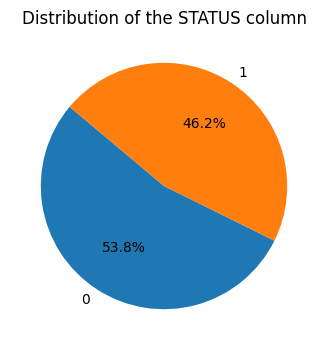

In [19]:
df['STATUS'] = np.where((df[' Candidate State'] == 'Hired') | (df[' Candidate State'] == 'Economic proposal') | (df[' event_feedback'] == 'OK (live)') | (df[' event_feedback'] == 'OK (waiting for departure)') | (df[' event_feedback'] == 'OK (hired)') | (df[' Candidate State'] == 'QM')  , 1, 0)

distribution = df['STATUS'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of the STATUS column') # 1 means the candidate is considered valid (even if still not hired), 0 the candidate is not considered valid for some reason
plt.show()

##### **1.6 Encode the categorical columns**

In [20]:
categorical_columns = [' Age Range', ' Citizenship', ' Sex',
       ' Protected category', ' Study area', ' Study Title',
       ' Years Experience', ' Sector', ' Job Family Hiring',
       ' Job Title Hiring', ' Overall',
       ' Minimum Ral', ' Ral Maximum', ' Study Level',
       'Current Ral', 'Expected Ral']

encoding_mappings = {}

for column in categorical_columns:
    encoder = LabelEncoder()
    df[f'{column}_encoded'] = encoder.fit_transform(df[column])
    encoding_mappings[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

df = df.drop(columns=categorical_columns)
df = df.drop(columns=[' Candidate State', ' event_feedback'])

In [21]:
# Get a look at the new dataset
print(f"The new columns of the dataset are: {df.columns}")
df.head()

The new columns of the dataset are: Index(['Technical Skills', 'Comunication', 'Maturity', 'Dynamism', 'Mobility',
       'English', 'STATUS', ' Age Range_encoded', ' Citizenship_encoded',
       ' Sex_encoded', ' Protected category_encoded', ' Study area_encoded',
       ' Study Title_encoded', ' Years Experience_encoded', ' Sector_encoded',
       ' Job Family Hiring_encoded', ' Job Title Hiring_encoded',
       ' Overall_encoded', ' Minimum Ral_encoded', ' Ral Maximum_encoded',
       ' Study Level_encoded', 'Current Ral_encoded', 'Expected Ral_encoded'],
      dtype='object')


,Technical Skills,Comunication,Maturity,Dynamism,Mobility,English,STATUS,Age Range_encoded,Citizenship_encoded,Sex_encoded,...,Years Experience_encoded,Sector_encoded,Job Family Hiring_encoded,Job Title Hiring_encoded,Overall_encoded,Minimum Ral_encoded,Ral Maximum_encoded,Study Level_encoded,Current Ral_encoded,Expected Ral_encoded
0,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973,1,1,1,1,...,3,1,3,5,4,6,8,1,3,4
1,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973,1,1,1,1,...,3,1,3,5,4,6,8,1,3,4
2,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973,1,1,1,1,...,3,1,3,5,4,6,8,1,3,4
3,2.000000,1.00000,2.000000,2.00000,3.000000,3.000000,1,1,1,1,...,3,1,3,5,6,6,8,1,3,4
4,2.177666,2.32004,2.285714,2.29606,2.225979,2.764973,1,1,1,1,...,3,1,3,5,4,6,8,1,3,4


In [22]:
# And at an example of encoding mapping
print(encoding_mappings)

{' Age Range': {'Senior': 0, 'Young': 1}, ' Citizenship': {'European': 0, 'Non-European': 1}, ' Sex': {'Female': 0, 'Male': 1}, ' Protected category': {'Article 1': 0, 'Not a protected category': 1}, ' Study area': {'Economic': 0, 'Engineering': 1, 'Informatics': 2, 'Law': 3, 'Linguistics': 4, 'Medical Field': 5, 'NO COLLEGE': 6, 'Other': 7, 'Other Humanities Subjects': 8, 'Scientific Field': 9}, ' Study Title': {'Doctorate': 0, 'Five-year degree': 1, 'High school graduation': 2, 'Middle school diploma': 3, 'Professional qualification': 4, 'Three-year degree': 5, "master's degree": 6}, ' Years Experience': {'[+10]': 0, '[0-1]': 1, '[0]': 2, '[1-3]': 3, '[3-5]': 4, '[5-7]': 5, '[7-10]': 6}, ' Sector': {'Aeronautics': 0, 'Automotive': 1, 'Consulting': 2, 'Defence': 3, 'Energy': 4, 'Life sciences': 5, 'Machining - Heavy Industry': 6, 'Naval': 7, 'Oil and Gas': 8, 'Others': 9, 'Railway': 10, 'Services and Information Systems': 11, 'Space': 12, 'Telecom': 13, 'Unemployed': 14}, ' Job Family

##### **1.7 Visualize data (TBD)**
**Citizenship**

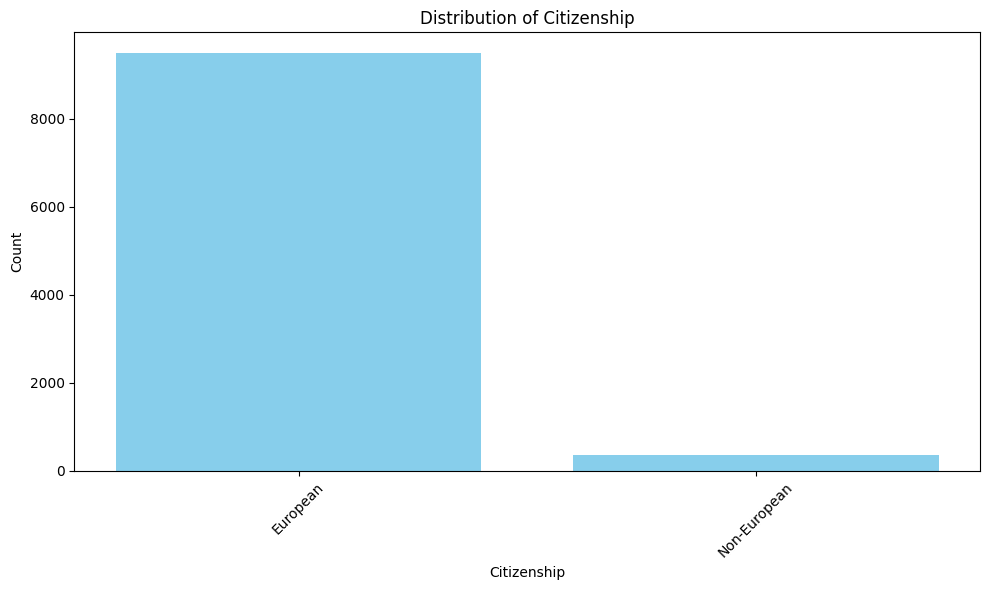

In [23]:
citizenship_mapping = {v: k for k, v in encoding_mappings[' Citizenship'].items()}
distribution = df[' Citizenship_encoded'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values, color='skyblue')

# Replace the x-tick labels with the mapped values
plt.xticks(distribution.index, distribution.index.map(citizenship_mapping), rotation=45)

plt.title('Distribution of Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Age**

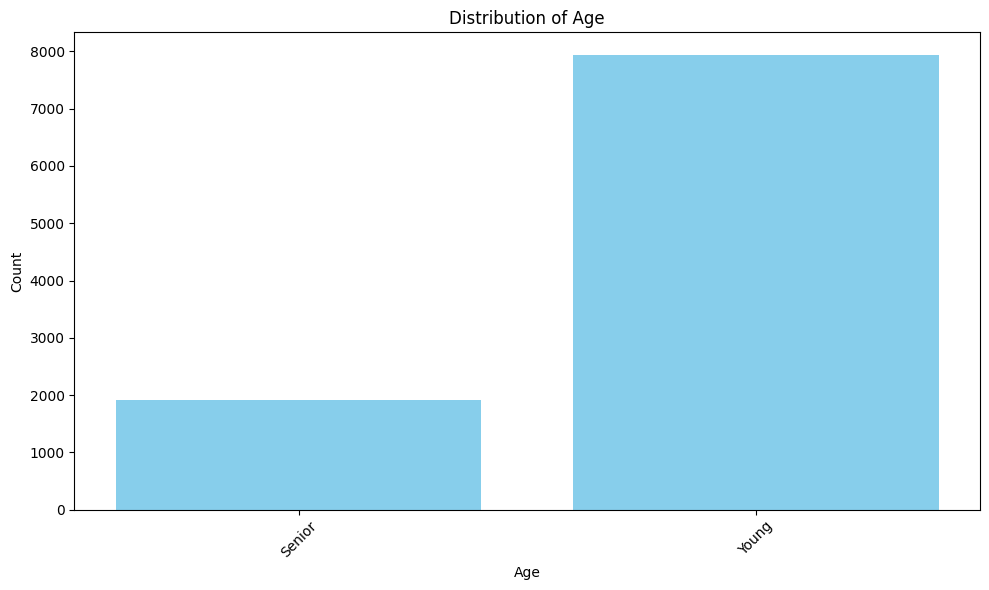

In [24]:
age_mapping = {v: k for k, v in encoding_mappings[' Age Range'].items()}
distribution = df[' Age Range_encoded'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values, color='skyblue')

# Replace the x-tick labels with the mapped values
plt.xticks(distribution.index, distribution.index.map(age_mapping), rotation=45)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Gender:**

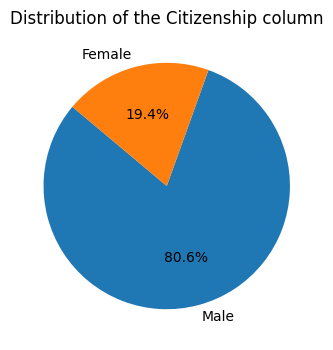

In [25]:
gender_mapping = {v: k for k, v in encoding_mappings[' Sex'].items()}
distribution = df[' Sex_encoded'].value_counts()
distribution.index = distribution.index.map(gender_mapping)

plt.figure(figsize=(4, 4))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of the Citizenship column')
plt.show()

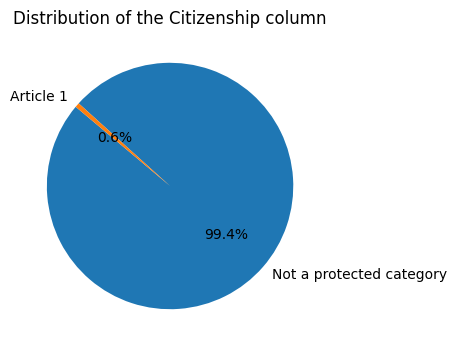

In [26]:
gender_mapping = {v: k for k, v in encoding_mappings[' Protected category'].items()}
distribution = df[' Protected category_encoded'].value_counts()
distribution.index = distribution.index.map(gender_mapping)

plt.figure(figsize=(4, 4))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of the Citizenship column')
plt.show()

**Correlation Matrix**

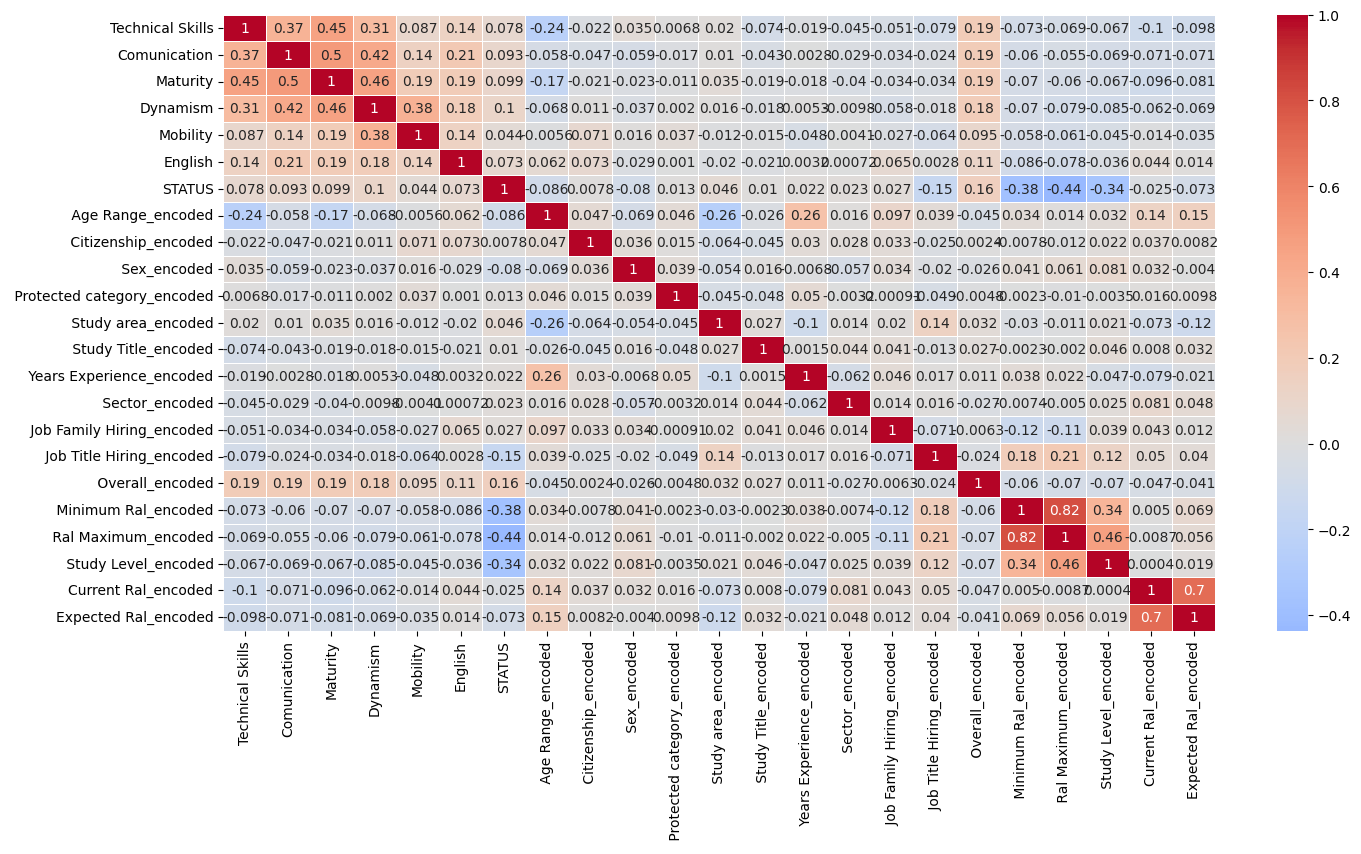

In [27]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.show()

##### **1.8 Visualize percentage of hired inside each class**

In [28]:
sensitive_features = [' Sex_encoded', ' Age Range_encoded', ' Citizenship_encoded', ' Protected category_encoded']
for feature in sensitive_features:
    for i in range(len(list(df[feature].unique()))):
        total_elements = len(df[(df[feature] == i) & (df['STATUS'] == 1)])
        total_age = len(df[df[feature] == i])
        percentage = (total_elements / total_age) * 100 
        print(f"Percentage of elements where {feature} is {i} and STATUS is HIRED: {percentage:.2f}%")

Percentage of elements where  Sex_encoded is 0 and STATUS is HIRED: 54.32%
Percentage of elements where  Sex_encoded is 1 and STATUS is HIRED: 44.26%
Percentage of elements where  Age Range_encoded is 0 and STATUS is HIRED: 54.95%
Percentage of elements where  Age Range_encoded is 1 and STATUS is HIRED: 44.10%
Percentage of elements where  Citizenship_encoded is 0 and STATUS is HIRED: 46.13%
Percentage of elements where  Citizenship_encoded is 1 and STATUS is HIRED: 48.21%
Percentage of elements where  Protected category_encoded is 0 and STATUS is HIRED: 37.93%
Percentage of elements where  Protected category_encoded is 1 and STATUS is HIRED: 46.26%


In [29]:
encoding_mappings

{' Age Range': {'Senior': 0, 'Young': 1},
 ' Citizenship': {'European': 0, 'Non-European': 1},
 ' Sex': {'Female': 0, 'Male': 1},
 ' Protected category': {'Article 1': 0, 'Not a protected category': 1},
 ' Study area': {'Economic': 0,
  'Engineering': 1,
  'Informatics': 2,
  'Law': 3,
  'Linguistics': 4,
  'Medical Field': 5,
  'NO COLLEGE': 6,
  'Other': 7,
  'Other Humanities Subjects': 8,
  'Scientific Field': 9},
 ' Study Title': {'Doctorate': 0,
  'Five-year degree': 1,
  'High school graduation': 2,
  'Middle school diploma': 3,
  'Professional qualification': 4,
  'Three-year degree': 5,
  "master's degree": 6},
 ' Years Experience': {'[+10]': 0,
  '[0-1]': 1,
  '[0]': 2,
  '[1-3]': 3,
  '[3-5]': 4,
  '[5-7]': 5,
  '[7-10]': 6},
 ' Sector': {'Aeronautics': 0,
  'Automotive': 1,
  'Consulting': 2,
  'Defence': 3,
  'Energy': 4,
  'Life sciences': 5,
  'Machining - Heavy Industry': 6,
  'Naval': 7,
  'Oil and Gas': 8,
  'Others': 9,
  'Railway': 10,
  'Services and Information Sy

## **Task 2 - Algorithms**

In [30]:
# Shuffle the dataset
df = shuffle(df, random_state=random_seed)

# Split in X and y
X = df.drop(columns=['STATUS'])
y = df['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

##### **2.1 Machine Learning models**

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
}

In [32]:
metrics = []
predictions = {}

# Fit models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if name in ['Linear Regression', 'XGBoost']:
        y_pred = (y_pred > 0.5).astype(int)

    # Store predictions
    predictions[name] = y_pred

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)

    # Append metrics to the DataFrame
    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    })

metrics = pd.DataFrame(metrics)
metrics.head()

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Linear Regression,0.727,0.913,0.470,0.620,0.715
1,Decision Tree,0.788,0.789,0.753,0.771,0.786
2,Naive Bayes,0.779,1.000,0.534,0.696,0.767
3,XGBoost,0.816,0.900,0.690,0.781,0.810
4,KNN,0.789,0.820,0.711,0.762,0.785


In [33]:
predictions_df = pd.DataFrame({
    'Linear Regression' : predictions['Linear Regression'],
    'Decision Tree' : predictions['Decision Tree'],
    'Naive Bayes' : predictions['Naive Bayes'],
    'XGBoost' : predictions['XGBoost'],
    'kNN' : predictions['KNN']
})

##### **2.2 Neural Network**

In [34]:
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=22, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# List to hold the models
neural_models = []

# Create and compile 7 models with different seeds
for seed in range(85,92):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    model = create_model()
    neural_models.append(model)

In [35]:
# Fit the models
histories = []
for i, model in enumerate(neural_models):
    print(f"Fitting model {i+1}...")
    history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
    histories.append(history)
    print(f"Model {i+1} fitted.\n")

Fitting model 1...
Epoch 1/15
99/99 [==============================] - 2s 6ms/step - loss: 0.5342 - accuracy: 0.7288 - val_loss: 0.6504 - val_accuracy: 0.5358
Epoch 2/15
99/99 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.7579 - val_loss: 0.5035 - val_accuracy: 0.7495
Epoch 3/15
99/99 [==============================] - 0s 4ms/step - loss: 0.4673 - accuracy: 0.7640 - val_loss: 0.4739 - val_accuracy: 0.7717
Epoch 4/15
99/99 [==============================] - 0s 4ms/step - loss: 0.4537 - accuracy: 0.7792 - val_loss: 0.4586 - val_accuracy: 0.7793
Epoch 5/15
99/99 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.7790 - val_loss: 0.4545 - val_accuracy: 0.7812
Epoch 6/15
99/99 [==============================] - 0s 4ms/step - loss: 0.4444 - accuracy: 0.7800 - val_loss: 0.4672 - val_accuracy: 0.7749
Epoch 7/15
99/99 [==============================] - 0s 4ms/step - loss: 0.4420 - accuracy: 0.7849 - val_loss: 0.4519 - val_accuracy: 0.7819
E

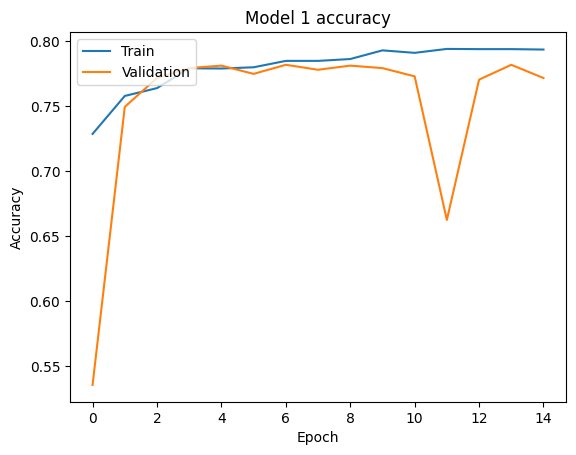

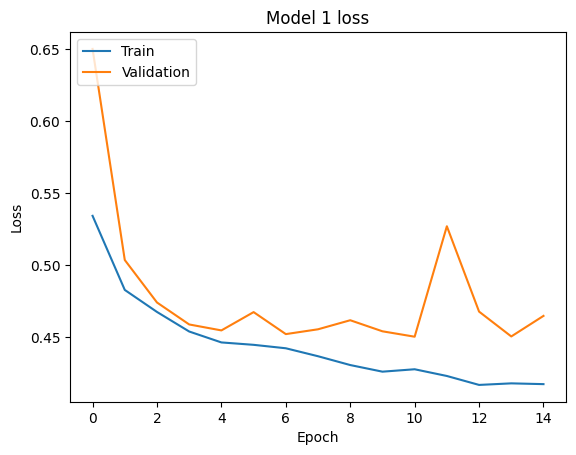

In [36]:
# Check training procedure
plt.plot(histories[0].history['accuracy'])
plt.plot(histories[0].history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(histories[0].history['loss'])
plt.plot(histories[0].history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
neural_predictions = []

for i, model in enumerate(neural_models):
    print(f"Predicting with model {i+1}...")
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    neural_predictions.append(y_pred)
    print(f"Predictions from model {i+1} stored.\n")

Predicting with model 1...
62/62 [==============================] - 0s 2ms/step
Predictions from model 1 stored.

Predicting with model 2...
62/62 [==============================] - 0s 2ms/step
Predictions from model 2 stored.

Predicting with model 3...
62/62 [==============================] - 0s 2ms/step
Predictions from model 3 stored.

Predicting with model 4...
62/62 [==============================] - 0s 2ms/step
Predictions from model 4 stored.

Predicting with model 5...
62/62 [==============================] - 0s 2ms/step
Predictions from model 5 stored.

Predicting with model 6...
62/62 [==============================] - 0s 2ms/step
Predictions from model 6 stored.

Predicting with model 7...
62/62 [==============================] - 0s 2ms/step
Predictions from model 7 stored.



In [38]:
nn_metrics = []

for i, y_pred in enumerate(neural_predictions):
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)

    nn_metrics.append({
        "Model": f"Neural Network {i+1}",
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc
    })

# Display the 7 models performances
nn_metrics = pd.DataFrame(nn_metrics)
nn_metrics

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Neural Network 1,0.774,0.833,0.655,0.733,0.768
1,Neural Network 2,0.747,0.747,0.705,0.725,0.745
2,Neural Network 3,0.768,0.840,0.631,0.721,0.762
3,Neural Network 4,0.778,0.860,0.636,0.731,0.771
4,Neural Network 5,0.780,0.854,0.646,0.736,0.773
5,Neural Network 6,0.782,0.862,0.643,0.737,0.775
6,Neural Network 7,0.758,0.775,0.690,0.730,0.755


In [39]:
combined_metrics = pd.concat([metrics, nn_metrics], ignore_index=True)
combined_metrics

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Linear Regression,0.727,0.913,0.470,0.620,0.715
1,Decision Tree,0.788,0.789,0.753,0.771,0.786
2,Naive Bayes,0.779,1.000,0.534,0.696,0.767
3,XGBoost,0.816,0.900,0.690,0.781,0.810
4,KNN,0.789,0.820,0.711,0.762,0.785
5,Neural Network 1,0.774,0.833,0.655,0.733,0.768
6,Neural Network 2,0.747,0.747,0.705,0.725,0.745
7,Neural Network 3,0.768,0.840,0.631,0.721,0.762
8,Neural Network 4,0.778,0.860,0.636,0.731,0.771
9,Neural Network 5,0.780,0.854,0.646,0.736,0.773


In [40]:
# Add the NN to the models and to the predicitons
for i, model in enumerate(neural_models):
    models[f"Neural Network {i+1}"] = model

for i, prediction_list in enumerate(neural_predictions):
    predictions_df[f'Neural Network {i+1}'] = prediction_list.flatten()
    predictions[f'Neural Network {i+1}'] = prediction_list.flatten()

<br>
<br>

## **Task 3 - Fairness Metrics**

#### **3.1 Demographic Parity**

In [41]:
# Columns groups of interest
sensitive_features = [' Sex_encoded', ' Age Range_encoded', ' Citizenship_encoded', ' Protected category_encoded']
non_sensitive_features = ['Technical Skills', 'Comunication', 'Maturity', 'Dynamism', 'Mobility',
       'English', ' Study area_encoded', ' Study Title_encoded', ' Years Experience_encoded', ' Sector_encoded', ' Job Family Hiring_encoded',
       ' Job Title Hiring_encoded', ' Overall_encoded', ' Years Experience.1_encoded',' Minimum Ral_encoded', ' Ral Maximum_encoded',
       ' Study Level_encoded', 'Current Ral_encoded', 'Expected Ral_encoded']

models_list = [model for model in models]

# Tresholds
tolerance = 0.16
significance_level = 0.1

In [42]:
def calculate_demographic_parity(predictions, sensitive_attribute, name, significance_level, tolerance, activate_check=False):

    df = pd.DataFrame({
        'predictions': predictions,
        'sensitive_attribute': sensitive_attribute
    })

    # Proportion of positive predictions for each group   
    positive_proportions = df.groupby('sensitive_attribute')['predictions'].mean()
    num_class = positive_proportions.shape[0]
    min_proportion = positive_proportions.min()
    max_proportion = positive_proportions.max()
    percentage_difference = (max_proportion - min_proportion)

    # Case for binary sensitive attribute
    if num_class == 2:
        
        if activate_check == True:
            print("===")
            print(name)
            print(positive_proportions)

        if percentage_difference <= tolerance:
            return 'T'
        else:
            return False

    # Case for multiclass sensitive attribute
    if num_class > 2:
        contingency_table = pd.crosstab(df['predictions'], df['sensitive_attribute'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        if activate_check == True:
            print("===")
            print(name)
            print(positive_proportions)
            if (expected < 5).any():
                print(f"Sparse contigency for {name}")
                
        if p > significance_level:
            return 'T'
        else:
            return False

In [43]:
# Models behaviours over sensitive features
table = []

for model in models:
     temp = []
     for i in range(len(sensitive_features)):
        Boolean_Output = calculate_demographic_parity(predictions[model], X_test[sensitive_features[i]], sensitive_features[i], significance_level, tolerance, activate_check=True)
        temp.append(Boolean_Output)
     table.append(temp)

sf_df = pd.DataFrame(table, index = models_list, columns=sensitive_features)
sf_df.head(len(models_list))

===
 Sex_encoded
sensitive_attribute
0    0.392208
1    0.207940
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.384422
1    0.208386
Name: predictions, dtype: float64
===
 Citizenship_encoded
sensitive_attribute
0    0.247499
1    0.150685
Name: predictions, dtype: float64
===
 Protected category_encoded
sensitive_attribute
0    0.333333
1    0.243505
Name: predictions, dtype: float64
===
 Sex_encoded
sensitive_attribute
0    0.558442
1    0.426591
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.527638
1    0.433291
Name: predictions, dtype: float64
===
 Citizenship_encoded
sensitive_attribute
0    0.451817
1    0.465753
Name: predictions, dtype: float64
===
 Protected category_encoded
sensitive_attribute
0    0.555556
1    0.451859
Name: predictions, dtype: float64
===
 Sex_encoded
sensitive_attribute
0    0.374026
1    0.223693
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.3

,Sex_encoded,Age Range_encoded,Citizenship_encoded,Protected category_encoded
Linear Regression,False,False,T,T
Decision Tree,T,T,T,T
Naive Bayes,T,T,T,False
XGBoost,T,T,T,False
KNN,T,T,T,T
Neural Network 1,T,False,T,False
Neural Network 2,T,False,T,T
Neural Network 3,T,False,T,False
Neural Network 4,T,False,T,False
Neural Network 5,False,T,T,T


#### **3.2 Equalized odds**

In [44]:
def calculate_equalized_odds(predictions, true_labels, sensitive_attribute, name, tolerance, activate_check=False):
    df = pd.DataFrame({
        'predictions': predictions,
        'true_labels': true_labels,
        'sensitive_attribute': sensitive_attribute
    })

    # Calculate TPR and FPR for each group
    groups = df['sensitive_attribute'].unique()
    metrics = {}
    for group in groups:
        group_df = df[df['sensitive_attribute'] == group]
        cm = confusion_matrix(group_df['true_labels'], group_df['predictions'], labels=[0, 1])
        tn, fp, fn, tp = cm.ravel()

        tpr = tp / (tp + fn) if tp + fn != 0 else 0
        fpr = fp / (fp + tn) if fp + tn != 0 else 0
        metrics[group] = {'TPR': tpr, 'FPR': fpr}

    # Check if TPR and FPR are within the tolerance
    tprs = [metrics[group]['TPR'] for group in groups]
    fprs = [metrics[group]['FPR'] for group in groups]

    max_tpr_diff = max(tprs) - min(tprs)
    max_fpr_diff = max(fprs) - min(fprs)

    if activate_check == True:
        print("===")
        print(name)
        print(max_fpr_diff)
        print(max_tpr_diff)

    tpr_within_tolerance = max_tpr_diff <= tolerance
    fpr_within_tolerance = max_fpr_diff <= tolerance

    if tpr_within_tolerance and fpr_within_tolerance:
        return 'T'
    else:
        return False

In [45]:
# Equalized odds
table = []

for model in models:
    temp = []
    for i in range(len(sensitive_features)):
        Boolean_Output = calculate_equalized_odds(predictions[model], y_test, X_test[sensitive_features[i]], sensitive_features[i], tolerance, activate_check=False)
        temp.append(Boolean_Output)
    table.append(temp)

# DataFrame
equalized_df = pd.DataFrame(table, index = models_list, columns=sensitive_features)
equalized_df.head(len(models_list))

,Sex_encoded,Age Range_encoded,Citizenship_encoded,Protected category_encoded
Linear Regression,False,T,False,T
Decision Tree,False,T,T,T
Naive Bayes,False,T,False,False
XGBoost,False,T,T,False
KNN,False,T,T,T
Neural Network 1,False,T,T,False
Neural Network 2,False,T,T,False
Neural Network 3,False,False,T,False
Neural Network 4,False,T,T,False
Neural Network 5,False,T,T,T


## **Task 4 - Explainable AI**

#### **4.1 Lime**

In [46]:
# Initialize LimeTabularExplainer using the training data
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                 mode="classification",
                                 feature_names=X_train.columns.tolist(),
                                 class_names=['Not Hired', 'Hired'])

LIME EXPLANATIONS FOR DECISION TREE


<Figure size 500x300 with 0 Axes>

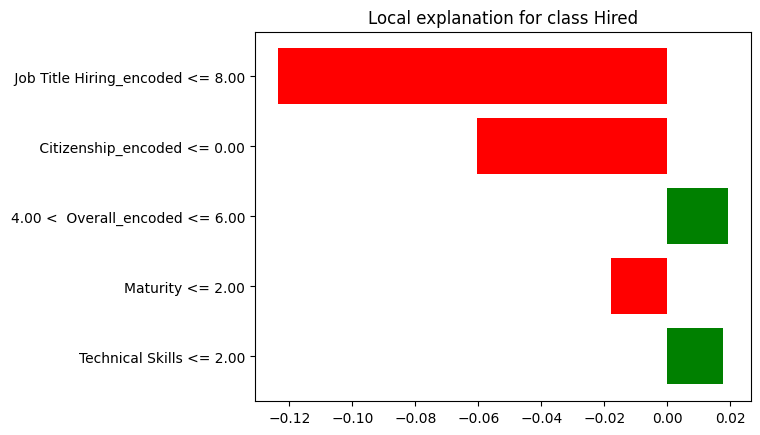

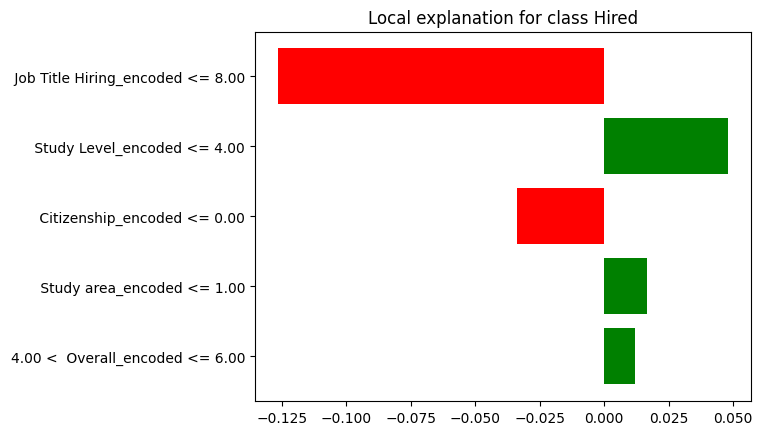

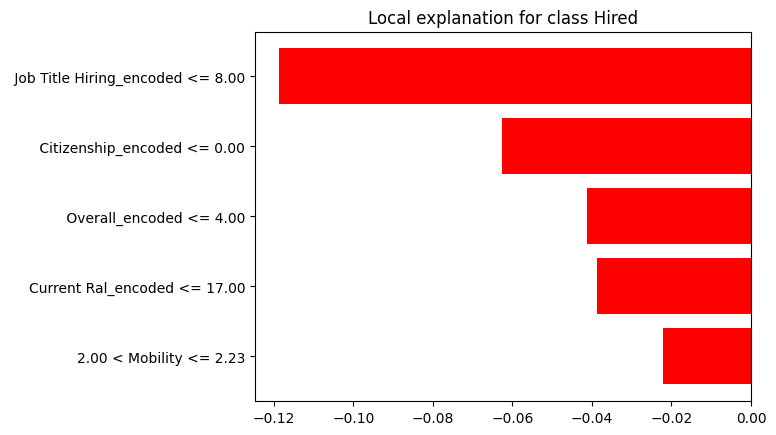

In [47]:
# Initialize LimeTabularExplainer using the training data
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                 mode="classification",
                                 feature_names=X_train.columns.tolist(),
                                 class_names=['Not Hired', 'Hired'])
plt.figure(figsize=(5, 3))

print("LIME EXPLANATIONS FOR DECISION TREE")
for i in range(10,13):
    exp_dt = explainer.explain_instance(X_test.values[i], models['Decision Tree'].predict_proba, num_features=5)
    fig_dt = exp_dt.as_pyplot_figure()
    plt.show()



LIME EXPLANATIONS FOR NAIVE BAYES


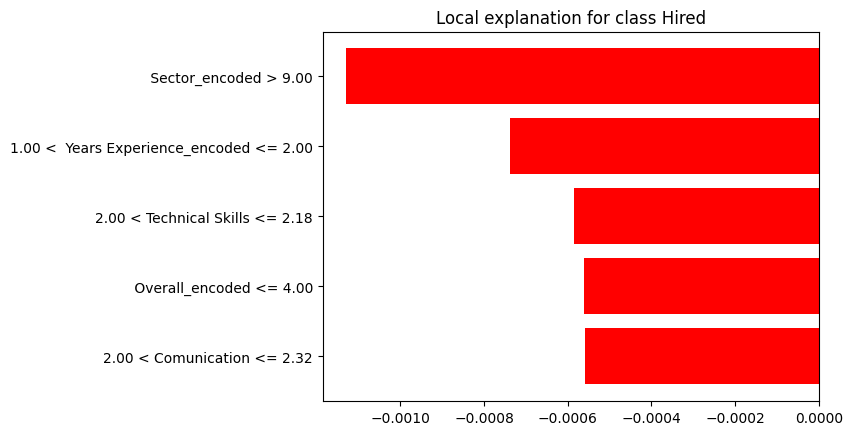

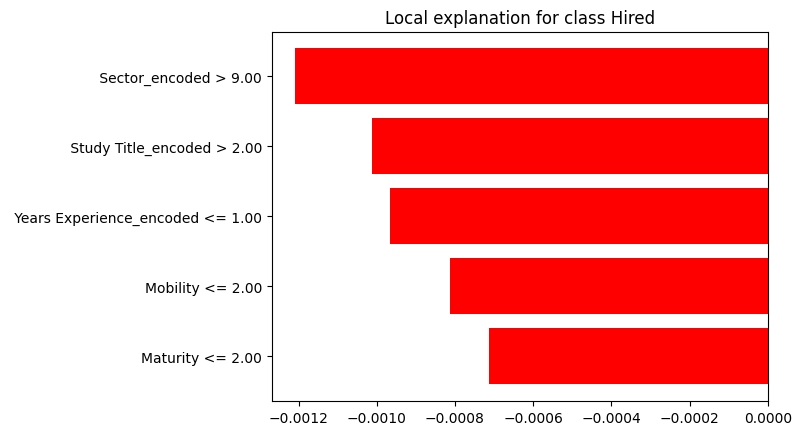

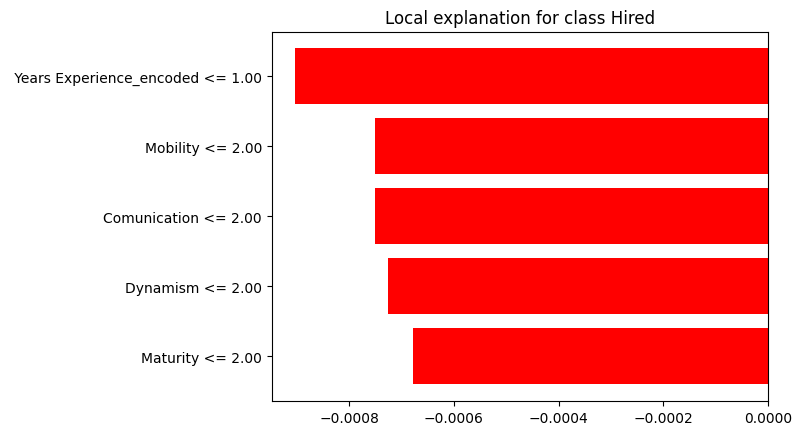

In [48]:
print("LIME EXPLANATIONS FOR NAIVE BAYES")
for i in range(21,24):
    exp_dt = explainer.explain_instance(X_test.values[i], models['Naive Bayes'].predict_proba, num_features=5)
    fig_dt = exp_dt.as_pyplot_figure()
    plt.show()

LIME EXPLANATIONS FOR KNN


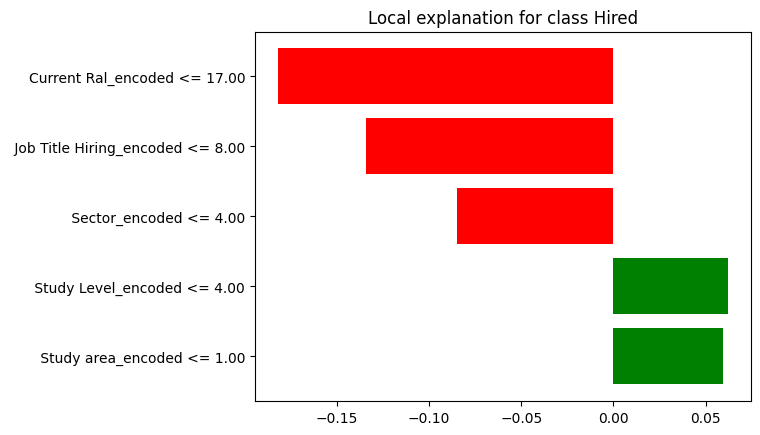

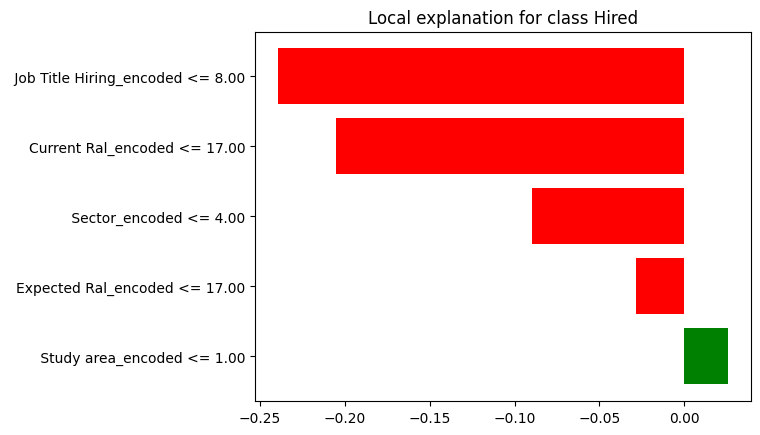

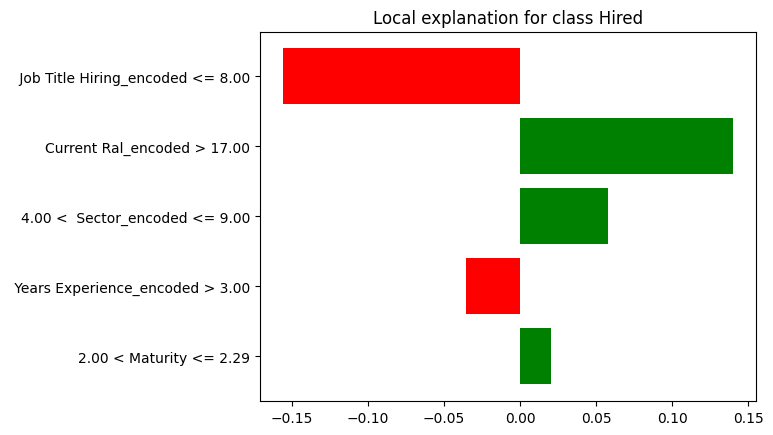

In [49]:
print("LIME EXPLANATIONS FOR KNN")
for i in range(16,19):
    exp_dt = explainer.explain_instance(X_test.values[i], models['KNN'].predict_proba, num_features=5)
    fig_dt = exp_dt.as_pyplot_figure()
    plt.show()

#### **3.4 SHAP**

In [50]:
def create_explanations(model, X, name):

    if name == 'Neural Network 1':
        # We need a slightly different explainer for NN
        explainer = shap.GradientExplainer (models[models_list[5]], X_test.values)
        #print(explainer(X_test.values))
        shap_values = explainer.shap_values(X_test.values)[:1000][:][0]
        print(shap_values.shape)
        return shap_values, X

    if name == 'Neural Network 2':
        # We need a slightly different explainer for NN
        explainer = shap.GradientExplainer (models[models_list[6]], X_test.values)
        shap_values = explainer.shap_values(X_test.values)[:1000][:][0]
        return shap_values, X

    if name == 'Neural Network 3':
        # We need a slightly different explainer for NN
        explainer = shap.GradientExplainer (models[models_list[7]], X_test.values)
        shap_values = explainer.shap_values(X_test.values)[:1000][:][0]
        return shap_values, X

    if name == 'Neural Network 4':
        # We need a slightly different explainer for NN
        explainer = shap.GradientExplainer (models[models_list[8]], X_test.values)
        shap_values = explainer.shap_values(X_test.values)[:1000][:][0]
        return shap_values, X

    if name == 'Neural Network 5':
        # We need a slightly different explainer for NN
        explainer = shap.GradientExplainer (models[models_list[9]], X_test.values)
        shap_values = explainer.shap_values(X_test.values)[:1000][:][0]
        return shap_values, X

    if name == 'Neural Network 6':
        # We need a slightly different explainer for NN
        explainer = shap.GradientExplainer (models[models_list[10]], X_test.values)
        shap_values = explainer.shap_values(X_test.values)[:1000][:][0]
        return shap_values, X

    if name == 'Neural Network 7':
        # We need a slightly different explainer for NN
        explainer = shap.GradientExplainer (models[models_list[11]], X_test.values)
        shap_values = explainer.shap_values(X_test.values)[:1000][:][0]
        return shap_values, X

    # Add feature names
    explainer = shap.Explainer(model, X)
    explanations = explainer(X)
    return explanations, X

def summaryPlot(model, X, lf, plot_type, plot_name):
    explanations, X = create_explanations(model, X, plot_name)

    # Create plot
    fig, ax = plt.subplots()
    plt.title(f"{plot_name}")
    shap.summary_plot(explanations, X, lf, show=False, plot_size=None, plot_type=plot_type, max_display=len(lf), sort=True)
    plt.tight_layout()
    plt.show()
    plt.close()

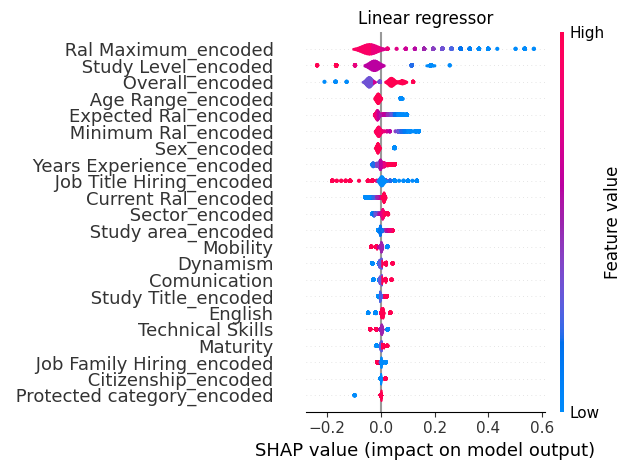

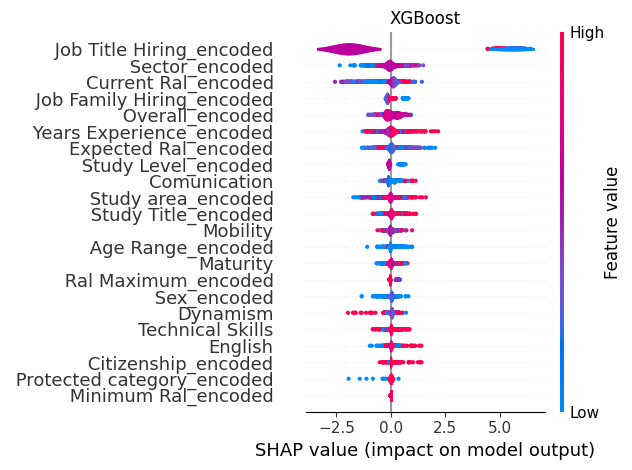

5
6
7
8
9
10
11


In [51]:
tot_columns = list(X_test.columns)
summaryPlot(models[models_list[0]], X_test, tot_columns, plot_type='violin', plot_name='Linear regressor')
summaryPlot(models[models_list[3]], X_test, tot_columns, plot_type='violin', plot_name='XGBoost')
for i in range(5, 12):
    print(i)
    #summaryPlot(models[models_list[i]], X_test, tot_columns, plot_type='violin', plot_name=f'Neural Network {i-4}')

<br>
<br>

## **Task 5 - Fairness improvement techniques**

#### **5.1 Reweighing**

##### 5.1.1 Build the rewrighted dataset

In [52]:
def reweight_dataset(df, sensitive_features, target_col='STATUS', random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Calculate weights based on sensitive feature distribution
    group_counts = df.groupby(sensitive_features).size()
    group_weights = 1 / group_counts
    group_weights /= group_weights.sum()

    # Map weights to each sample based on its group membership
    sample_weights = df[sensitive_features].apply(tuple, axis=1).map(group_weights)

    # Normalize sample weights
    sample_weights /= sample_weights.sum()

    # Resample the dataset based on the calculated sample weights
    reweighted_indices = np.random.choice(df.index, size=len(df), replace=True, p=sample_weights)
    df_reweighted = df.loc[reweighted_indices]

    X_train_reweighted = df_reweighted.drop(columns=[target_col])
    y_train_reweighted = df_reweighted[target_col]
    #print(X_train_reweighted.shape)

    return X_train_reweighted, y_train_reweighted


In [53]:
X_train_reweighted, y_train_reweighted = reweight_dataset(df, sensitive_features, 'STATUS')

In [54]:
print("Distribution before reweighting:")
print(df[sensitive_features].value_counts())

print("\n\nDistribution after reweighting:")
print(X_train_reweighted[sensitive_features].value_counts())

Distribution before reweighting:
 Sex_encoded   Age Range_encoded   Citizenship_encoded   Protected category_encoded
1             1                   0                     1                              5980
              0                   0                     1                              1612
0             1                   0                     1                              1597
1             1                   1                     1                               292
0             0                   0                     1                               247
              1                   1                     1                                35
1             0                   1                     1                                27
              1                   0                     0                                19
              0                   0                     0                                16
0             1                   0                    

##### 5.1.2 Re-fit and evaluate the machine learning models

In [55]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
}

In [56]:
metrics = []
predictions = {}

# Fit models and evaluate
for name, model in models.items():
    model.fit(X_train_reweighted, y_train_reweighted)
    y_pred = model.predict(X_test)

    if name in ['Linear Regression', 'XGBoost']:
        y_pred = (y_pred > 0.5).astype(int)

    # Store predictions
    predictions[name] = y_pred

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)

    # Append metrics to the DataFrame
    metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    })

metrics = pd.DataFrame(metrics)
metrics

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Linear Regression,0.666,0.723,0.478,0.576,0.657
1,Decision Tree,0.802,0.793,0.787,0.790,0.801
2,Naive Bayes,0.779,1.000,0.534,0.696,0.767
3,XGBoost,0.817,0.833,0.768,0.799,0.815
4,KNN,0.761,0.771,0.706,0.737,0.758


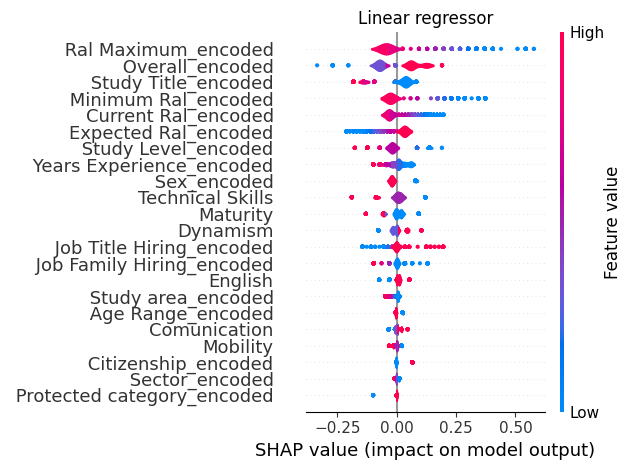

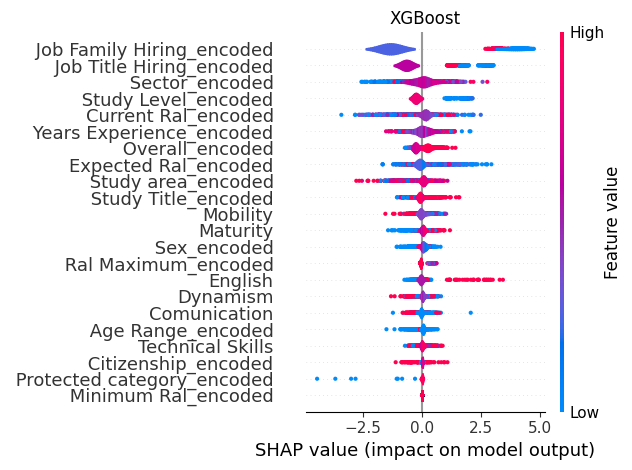

In [57]:
summaryPlot(models[models_list[0]], X_test, tot_columns, plot_type='violin', plot_name='Linear regressor')
summaryPlot(models[models_list[3]], X_test, tot_columns, plot_type='violin', plot_name='XGBoost')

##### 5.1.3 Re-fit and evaluate the Neural Network

In [58]:
neural_models = []

# Create and compile the 7 models
for seed in range(85,92):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    model = create_model()
    neural_models.append(model)

In [59]:
# Fit the models
histories = []
for i, model in enumerate(neural_models):
    print(f"Fitting model {i+1}...")
    history = model.fit(X_train_reweighted, y_train_reweighted, epochs=15, batch_size=64, validation_split=0.2)
    histories.append(history)
    print(f"Model {i+1} fitted.\n")

Fitting model 1...
Epoch 1/15
124/124 [==============================] - 3s 6ms/step - loss: 0.3399 - accuracy: 0.8511 - val_loss: 0.5200 - val_accuracy: 0.7287
Epoch 2/15
124/124 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.8886 - val_loss: 0.3820 - val_accuracy: 0.8043
Epoch 3/15
124/124 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.8980 - val_loss: 0.2790 - val_accuracy: 0.8707
Epoch 4/15
124/124 [==============================] - 0s 4ms/step - loss: 0.2118 - accuracy: 0.9082 - val_loss: 0.2759 - val_accuracy: 0.8727
Epoch 5/15
124/124 [==============================] - 1s 4ms/step - loss: 0.2022 - accuracy: 0.9115 - val_loss: 0.2445 - val_accuracy: 0.8905
Epoch 6/15
124/124 [==============================] - 1s 4ms/step - loss: 0.1901 - accuracy: 0.9167 - val_loss: 0.2488 - val_accuracy: 0.8803
Epoch 7/15
124/124 [==============================] - 0s 4ms/step - loss: 0.1803 - accuracy: 0.9195 - val_loss: 0.2138 - val_accu

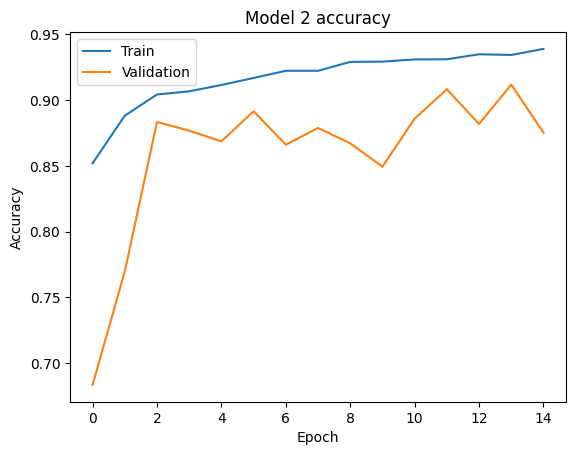

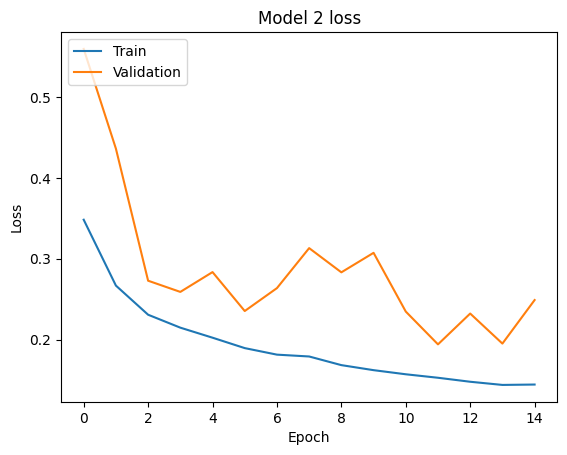

In [60]:
# Check training procedure
plt.plot(histories[1].history['accuracy'])
plt.plot(histories[1].history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(histories[1].history['loss'])
plt.plot(histories[1].history['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [61]:
neural_predictions = []

for i, model in enumerate(neural_models):
    print(f"Predicting with model {i+1}...")
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    neural_predictions.append(y_pred)
    print(f"Predictions from model {i+1} stored.\n")

Predicting with model 1...
62/62 [==============================] - 0s 2ms/step
Predictions from model 1 stored.

Predicting with model 2...
62/62 [==============================] - 0s 2ms/step
Predictions from model 2 stored.

Predicting with model 3...
62/62 [==============================] - 0s 2ms/step
Predictions from model 3 stored.

Predicting with model 4...
62/62 [==============================] - 0s 2ms/step
Predictions from model 4 stored.

Predicting with model 5...
62/62 [==============================] - 0s 2ms/step
Predictions from model 5 stored.

Predicting with model 6...
62/62 [==============================] - 0s 2ms/step
Predictions from model 6 stored.

Predicting with model 7...
62/62 [==============================] - 0s 2ms/step
Predictions from model 7 stored.



In [62]:
nn_metrics = []

for i, y_pred in enumerate(neural_predictions):
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)

    nn_metrics.append({
        "Model": f"Neural Network {i+1}",
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc
    })

# Save the 7 models performances
nn_metrics = pd.DataFrame(nn_metrics)

In [63]:
combined_metrics = pd.concat([metrics, nn_metrics], ignore_index=True)
combined_metrics

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Linear Regression,0.666,0.723,0.478,0.576,0.657
1,Decision Tree,0.802,0.793,0.787,0.790,0.801
2,Naive Bayes,0.779,1.000,0.534,0.696,0.767
3,XGBoost,0.817,0.833,0.768,0.799,0.815
4,KNN,0.761,0.771,0.706,0.737,0.758
5,Neural Network 1,0.732,0.704,0.752,0.727,0.733
6,Neural Network 2,0.737,0.716,0.739,0.727,0.737
7,Neural Network 3,0.769,0.790,0.699,0.742,0.766
8,Neural Network 4,0.755,0.739,0.748,0.743,0.755
9,Neural Network 5,0.749,0.730,0.748,0.739,0.749


In [64]:
# Add the NN to the models and to the predicitons
for i, model in enumerate(neural_models):
    models[f"Neural Network {i+1}"] = model

for i, prediction_list in enumerate(neural_predictions):
    predictions_df[f'Neural Network {i+1}'] = prediction_list.flatten()
    predictions[f'Neural Network {i+1}'] = prediction_list.flatten()

##### **5.1.4 Demographic Parity and Equalized Loss after the reweighing**

In [65]:
# Demographic Parity
table = []

for model in models:
    temp = []
    for i in range(len(sensitive_features)):
        Boolean_Output = calculate_demographic_parity(predictions[model], X_test[sensitive_features[i]], sensitive_features[i], significance_level, tolerance, activate_check=True)
        temp.append(Boolean_Output)
    table.append(temp)

# DataFrame
dp_df = pd.DataFrame(table, index = list(models.keys()), columns=sensitive_features)
dp_df

===
 Sex_encoded
sensitive_attribute
0    0.548052
1    0.256459
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.306533
1    0.315121
Name: predictions, dtype: float64
===
 Citizenship_encoded
sensitive_attribute
0    0.307004
1    0.479452
Name: predictions, dtype: float64
===
 Protected category_encoded
sensitive_attribute
0    0.555556
1    0.312277
Name: predictions, dtype: float64
===
 Sex_encoded
sensitive_attribute
0    0.589610
1    0.441714
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.537688
1    0.453621
Name: predictions, dtype: float64
===
 Citizenship_encoded
sensitive_attribute
0    0.469194
1    0.506849
Name: predictions, dtype: float64
===
 Protected category_encoded
sensitive_attribute
0    0.555556
1    0.470199
Name: predictions, dtype: float64
===
 Sex_encoded
sensitive_attribute
0    0.374026
1    0.223693
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.3

,Sex_encoded,Age Range_encoded,Citizenship_encoded,Protected category_encoded
Linear Regression,False,T,False,False
Decision Tree,T,T,T,T
Naive Bayes,T,T,T,False
XGBoost,T,False,T,T
KNN,T,T,False,T
Neural Network 1,T,T,T,T
Neural Network 2,T,False,T,T
Neural Network 3,T,T,T,T
Neural Network 4,T,T,T,T
Neural Network 5,T,False,T,T


In [66]:
# Equalized odds
table = []

for model in models:
    temp = []
    for i in range(len(sensitive_features)):
        Boolean_Output = calculate_equalized_odds(predictions[model], y_test, X_test[sensitive_features[i]], sensitive_features[i], tolerance, activate_check=True)
        temp.append(Boolean_Output)
    table.append(temp)

# DataFrame
equalized_df = pd.DataFrame(table, index = list(models.keys()), columns=sensitive_features)
equalized_df

===
 Sex_encoded
0.23251900538485906
0.29628824126431785
===
 Age Range_encoded
0.051317381368463505
0.04110862863062775
===
 Citizenship_encoded
0.26082251082251084
0.06503942695479448
===
 Protected category_encoded
0.16553727008712488
0.5247311827956989
===
 Sex_encoded
0.002831010452961663
0.1816731912425692
===
 Age Range_encoded
0.11044495227853207
0.11729096196812161
===
 Citizenship_encoded
0.16303141303141305
0.19346295070125807
===
 Protected category_encoded
0.18586640851887706
0.21397849462365592
===
 Sex_encoded
0.0
0.2000144990575613
===
 Age Range_encoded
0.0
0.0489346830260744
===
 Citizenship_encoded
0.0
0.16171070848130975
===
 Protected category_encoded
0.0
0.26774193548387104
===
 Sex_encoded
0.09197154471544716
0.16949398289111206
===
 Age Range_encoded
0.02010350853609358
0.17769012818752572
===
 Citizenship_encoded
0.11507936507936507
0.10094504303858431
===
 Protected category_encoded
0.1393998063891578
0.23333333333333328
===
 Sex_encoded
0.07709059233449478
0.

,Sex_encoded,Age Range_encoded,Citizenship_encoded,Protected category_encoded
Linear Regression,False,T,False,False
Decision Tree,False,T,False,False
Naive Bayes,False,T,False,False
XGBoost,False,False,T,False
KNN,False,T,False,False
Neural Network 1,T,T,T,False
Neural Network 2,False,T,T,False
Neural Network 3,T,T,T,False
Neural Network 4,T,T,T,False
Neural Network 5,T,T,False,False


In [67]:
for i in range(5, 12):
    print(i)
    #summaryPlot(models[models_list[i]], X_test, tot_columns, plot_type='violin', plot_name=f'Neural Network {i-4}')

5
6
7
8
9
10
11


#### **5.2 - Adversarial Debiasing**

In [68]:
epochs = 15
batch_size = 64
threshold = 0.5
logits = True

names = [' Sex_encoded', ' Age Range_encoded', ' Citizenship_encoded', ' Protected category_encoded']
sensitive_f = [X_train[' Sex_encoded'], X_train[' Age Range_encoded'], X_train[' Citizenship_encoded'], X_train[' Protected category_encoded']]

In [69]:
def create_Main():
    model = Sequential([
        Dense(128, input_dim=22, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='relu'),
    ])

    return model

def create_adversary():
    adv = Sequential([
        Dense(128, input_dim=1, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='relu'),
    ])
    return adv

In [70]:
# Main 
loss_fcn_main = BinaryCrossentropy(from_logits=logits)

# Adversary
loss_fcn_sex = BinaryCrossentropy(from_logits=logits)  
loss_fcn_age = BinaryCrossentropy(from_logits=logits) 
loss_fcn_cit = BinaryCrossentropy(from_logits=logits) 
loss_fcn_pro = BinaryCrossentropy(from_logits=logits)  

loss_adv = [loss_fcn_sex, loss_fcn_age, loss_fcn_cit, loss_fcn_pro]

# Optimizers
optimizerm = Adam(learning_rate=0.001)
optimizers = Adam(learning_rate=0.0005)
optimizera = Adam(learning_rate=0.0005)
optimizerc = Adam(learning_rate=0.0005)
optimizerp = Adam(learning_rate=0.0005)

In [71]:
# Redefine nn100 and the adversarial networks
neural_models = []

# Create and compile 7 models with different seeds
for seed in range(85, 92):
    np.random.seed(seed)
    tf.random.set_seed(seed)

    # Create neural network model
    model = create_Main()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    neural_models.append(model)

In [72]:
adversary_models = []

# Adversary for sex prediction
adversary_sex = create_adversary()  
adversary_sex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adversary_models.append(adversary_sex)

# Adversary for age prediction
adversary_age = create_adversary()  
adversary_age.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adversary_models.append(adversary_age)

# Adversary for citizenship prediction
adversary_citizenship = create_adversary()   
adversary_citizenship.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adversary_models.append(adversary_citizenship)

# Adversary for profession prediction
adversary_protected = create_adversary() 
adversary_protected.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
adversary_models.append(adversary_protected)

In [73]:
def build_optimizers(neural_models, adversary_models):
    main_vars = [var for model in neural_models for var in model.trainable_variables]

    adv_vars = []
    for model in adversary_models:
        adv_vars.append([var for var in model.trainable_variables])

    optimizerm.build(main_vars)
    optimizers.build(adv_vars[0])
    optimizera.build(adv_vars[1])
    optimizerc.build(adv_vars[2])
    optimizerp.build(adv_vars[3])

    optimizer_list = [optimizers, optimizera, optimizerc, optimizerp]
    return optimizer_list 
    
# Build optimizers
optimizer_list = build_optimizers(neural_models, adversary_models)

In [74]:
def build_bacthed_data(X, y, sensitive_features, batch_size, names):

    Xb = []
    yb = []
    X_adv_b = []
    sens_f = []

    for i in range(0, len(X), batch_size):
        Xb.append(X[i:i+batch_size])
        yb.append(y[i:i+batch_size])

    for i in range(len(sensitive_features)):
        
        temp1 = []
        temp2 = []
        X_adv = X.drop(names[i], axis=1)
        sensitive_feature = sensitive_features[i]

        for j in range(0, len(X), batch_size):
            temp1.append(X_adv[j:j+batch_size])
            temp2.append(sensitive_feature[j:j+batch_size])

        X_adv_b.append(temp1)
        sens_f.append(temp2)
    
    return Xb, yb, sens_f, X_adv_b
        
Xb, yb, sens_f, X_adv_b = build_bacthed_data(X_train, y_train, sensitive_f, batch_size, names)

In [75]:
def train_nn(main, adv, X, y, sens_f, X_adv, epochs, adv_n, print_step=10):

    for epoch in range(epochs):
        print()
        for i in range(len(X)):

            X_batch = tf.convert_to_tensor(X[i].values, dtype=tf.float32)
            y_batch = tf.convert_to_tensor(y[i].values, dtype=tf.float32)
            sens = tf.convert_to_tensor(sens_f[adv_n][i], dtype=tf.float32)

            with tf.GradientTape(persistent=True) as tape:

                # Main loss
                main_preds = main(X_batch, training=True)
                loss_main = loss_fcn_main(y_batch, main_preds)
                
                # Adversary loss
                adv_preds = adv[adv_n](main_preds, training=True)      
                loss_adversary = loss_adv[adv_n](sens, adv_preds)

                # Combined loss
                combined_loss = tf.subtract(loss_main, tf.multiply(0.4, loss_adversary))


            # Update main weights
            gradients_main = tape.gradient(combined_loss, main.trainable_variables)
            filtered_gradients_main_and_vars = [(grad, var) for grad, var in zip(gradients_main, main.trainable_variables) if grad is not None]
            filtered_gradients_main, filtered_vars_main = zip(*filtered_gradients_main_and_vars)
            optimizerm.apply_gradients(zip(filtered_gradients_main, filtered_vars_main))

            # Update adversary weights
            model = adv[adv_n]

            optimizer = optimizer_list[adv_n]
            gradients_adv = tape.gradient(loss_adversary, model.trainable_variables)
            filtered_gradients_adv_and_vars = [(grad, var) for grad, var in zip(gradients_adv, model.trainable_variables) if grad is not None]
            filtered_gradients_adv, filtered_vars_adv = zip(*filtered_gradients_adv_and_vars)
            optimizer.apply_gradients(zip(filtered_gradients_adv, filtered_vars_adv))
                
            del tape

            if i % print_step == 0:
                print(f"Epoch {epoch+1} Batch {i}/{len(X)}:")
                print(f"  Main Loss: {loss_main.numpy()}, Adversary Loss: {loss_adversary}, Combined Loss: {combined_loss.numpy()}")

In [76]:
weight_sex = adversary_models[0].get_weights()
weight_age = adversary_models[1].get_weights()
weight_cit = adversary_models[2].get_weights()
weight_pro = adversary_models[3].get_weights()

for i,model in enumerate(neural_models):
  print()
  print("==================")
  print(f"Neural Network {i}")
  train_nn(model, adversary_models, Xb, yb, sens_f, X_adv_b, epochs, adv_n=1, print_step=60)

  adversary_models[0].set_weights(weight_sex)
  adversary_models[1].set_weights(weight_age)
  adversary_models[2].set_weights(weight_cit)
  adversary_models[3].set_weights(weight_pro)


Neural Network 0

Epoch 1 Batch 0/124:
  Main Loss: 0.7009265422821045, Adversary Loss: 0.5617291331291199, Combined Loss: 0.47623488306999207
Epoch 1 Batch 60/124:
  Main Loss: 0.5510749816894531, Adversary Loss: 0.639492392539978, Combined Loss: 0.29527801275253296
Epoch 1 Batch 120/124:
  Main Loss: 0.5383408069610596, Adversary Loss: 0.6917201280593872, Combined Loss: 0.26165273785591125

Epoch 2 Batch 0/124:
  Main Loss: 0.5678852796554565, Adversary Loss: 0.6516599655151367, Combined Loss: 0.30722129344940186
Epoch 2 Batch 60/124:
  Main Loss: 0.5037051439285278, Adversary Loss: 0.6313085556030273, Combined Loss: 0.2511817216873169
Epoch 2 Batch 120/124:
  Main Loss: 0.520009458065033, Adversary Loss: 0.6826934814453125, Combined Loss: 0.24693205952644348

Epoch 3 Batch 0/124:
  Main Loss: 0.5392300486564636, Adversary Loss: 0.6371709108352661, Combined Loss: 0.28436169028282166
Epoch 3 Batch 60/124:
  Main Loss: 0.49261561036109924, Adversary Loss: 0.6367069482803345, Combined 

In [77]:
main_predictions = []
for model in neural_models:
    y_pred = (model.predict(X_test) > 0.5).astype("int32").squeeze()
    main_predictions.append(y_pred)

62/62 [==============================] - 0s 2ms/step


In [78]:
nn_metrics = []

for i, y_pred in enumerate(main_predictions):
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)

    nn_metrics.append({
        "Model": f"Neural Network {i+1}",
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc
    })

# Display the 7 models performances
nn_metrics = pd.DataFrame(nn_metrics)
nn_metrics

,Model,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Neural Network 1,0.779,1.000,0.534,0.696,0.767
1,Neural Network 2,0.779,1.000,0.534,0.696,0.767
2,Neural Network 3,0.779,1.000,0.534,0.696,0.767
3,Neural Network 4,0.766,0.914,0.559,0.694,0.756
4,Neural Network 5,0.702,0.698,0.657,0.677,0.700
5,Neural Network 6,0.777,1.000,0.529,0.692,0.765
6,Neural Network 7,0.779,1.000,0.534,0.696,0.767


In [79]:
temp = []
row_names = [f'Neural Network {i+1}' for i in range(7)]

for j in range(len(main_predictions)):
        temp1 = []
        for i in range(len(sensitive_features)):
                Boolean_Output = calculate_demographic_parity(main_predictions[j], X_test[sensitive_features[i]], sensitive_features[i], significance_level, tolerance, activate_check=True)
                temp1.append(Boolean_Output)
        temp.append(temp1)

===
 Sex_encoded
sensitive_attribute
0    0.374026
1    0.223693
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.324121
1    0.235070
Name: predictions, dtype: float64
===
 Citizenship_encoded
sensitive_attribute
0    0.255398
1    0.191781
Name: predictions, dtype: float64
===
 Protected category_encoded
sensitive_attribute
0    0.444444
1    0.252165
Name: predictions, dtype: float64
===
 Sex_encoded
sensitive_attribute
0    0.374026
1    0.223693
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.324121
1    0.235070
Name: predictions, dtype: float64
===
 Citizenship_encoded
sensitive_attribute
0    0.255398
1    0.191781
Name: predictions, dtype: float64
===
 Protected category_encoded
sensitive_attribute
0    0.444444
1    0.252165
Name: predictions, dtype: float64
===
 Sex_encoded
sensitive_attribute
0    0.374026
1    0.223693
Name: predictions, dtype: float64
===
 Age Range_encoded
sensitive_attribute
0    0.3

In [80]:
AD_results = pd.DataFrame(temp, columns=sensitive_features, index=row_names)
AD_results

,Sex_encoded,Age Range_encoded,Citizenship_encoded,Protected category_encoded
Neural Network 1,T,T,T,False
Neural Network 2,T,T,T,False
Neural Network 3,T,T,T,False
Neural Network 4,T,T,T,T
Neural Network 5,False,T,T,T
Neural Network 6,T,T,T,False
Neural Network 7,T,T,T,False


In [81]:
temp = []
row_names = [f'Neural Network {i+1}' for i in range(7)]

for j in range(len(main_predictions)):
        temp1 = []
        for i in range(len(sensitive_features)):
                Boolean_Output = calculate_equalized_odds(main_predictions[j], y_test, X_test[sensitive_features[i]], sensitive_features[i], tolerance, activate_check=True)
                temp1.append(Boolean_Output)
        temp.append(temp1)

===
 Sex_encoded
0.0
0.2000144990575613
===
 Age Range_encoded
0.0
0.0489346830260744
===
 Citizenship_encoded
0.0
0.16171070848130975
===
 Protected category_encoded
0.0
0.26774193548387104
===
 Sex_encoded
0.0
0.2000144990575613
===
 Age Range_encoded
0.0
0.0489346830260744
===
 Citizenship_encoded
0.0
0.16171070848130975
===
 Protected category_encoded
0.0
0.26774193548387104
===
 Sex_encoded
0.0
0.2000144990575613
===
 Age Range_encoded
0.0
0.0489346830260744
===
 Citizenship_encoded
0.0
0.16171070848130975
===
 Protected category_encoded
0.0
0.26774193548387104
===
 Sex_encoded
0.01585101889979939
0.203929244599101
===
 Age Range_encoded
0.020022852533942738
0.05593070134927669
===
 Citizenship_encoded
0.06615606615606615
0.04773370252212128
===
 Protected category_encoded
0.04743465634075508
0.24193548387096775
===
 Sex_encoded
0.30695016365748073
0.22647527910685805
===
 Age Range_encoded
0.24478424519424655
0.10159516706816285
===
 Citizenship_encoded
0.16591741591741593
0.0365

In [82]:
AD_results = pd.DataFrame(temp, columns=sensitive_features, index=row_names)
AD_results

,Sex_encoded,Age Range_encoded,Citizenship_encoded,Protected category_encoded
Neural Network 1,False,T,False,False
Neural Network 2,False,T,False,False
Neural Network 3,False,T,False,False
Neural Network 4,False,T,T,False
Neural Network 5,False,False,False,T
Neural Network 6,False,T,False,False
Neural Network 7,False,T,False,False


5


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


(1972, 22)


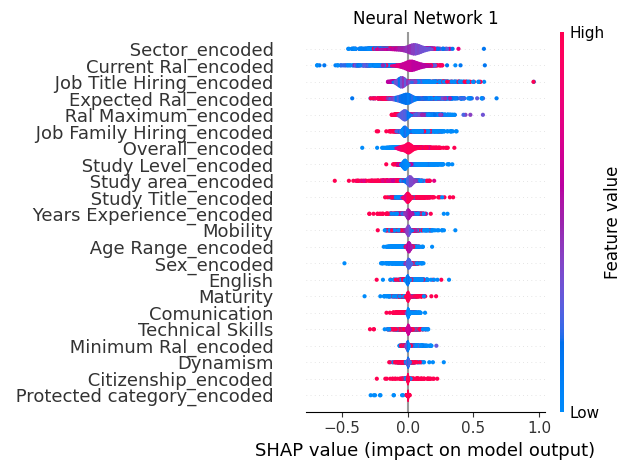

6


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


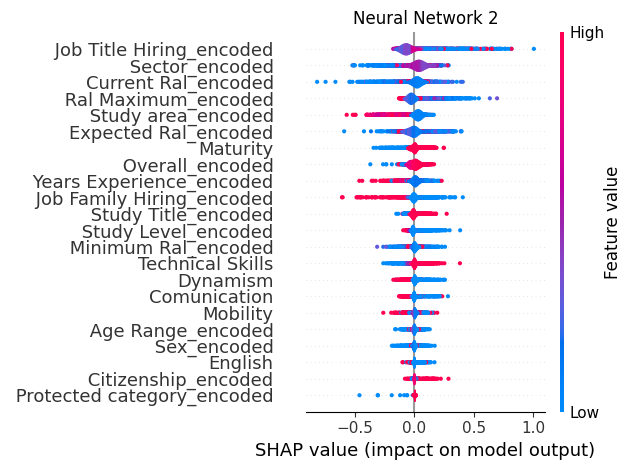

7


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


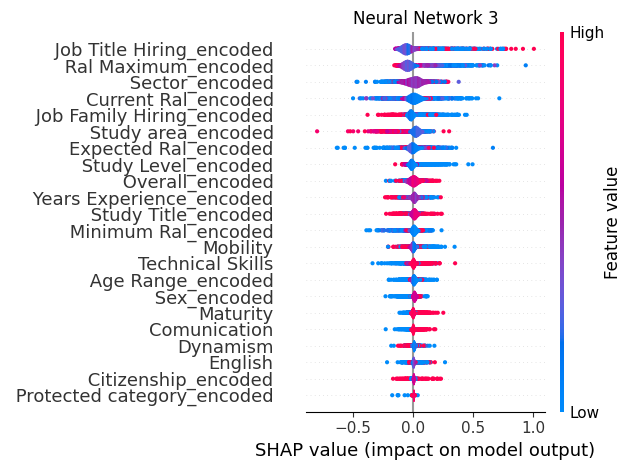

8


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


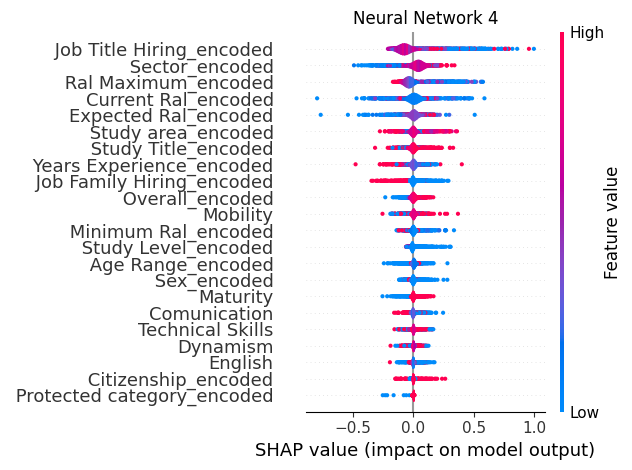

9


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


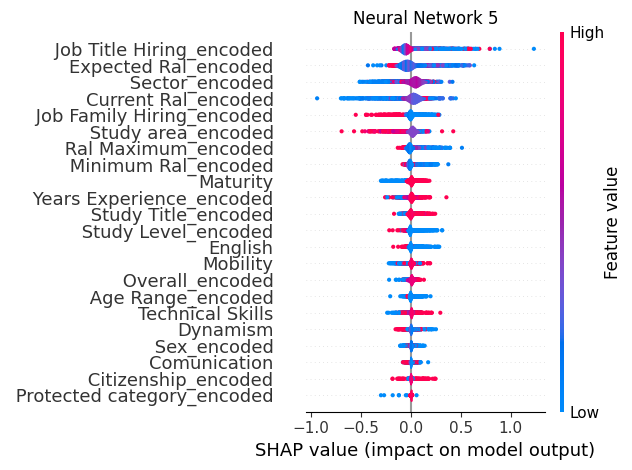

10


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


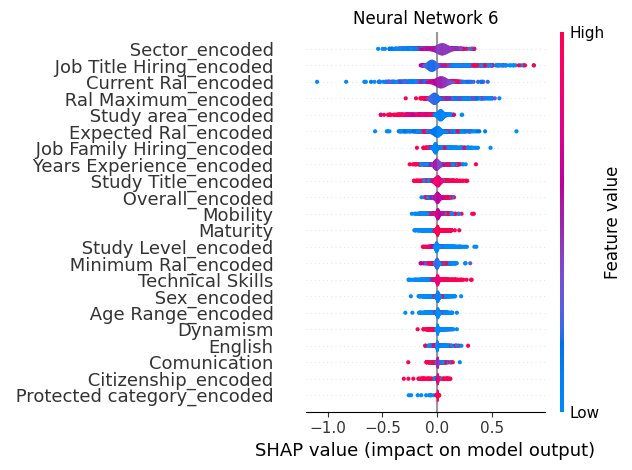

11


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


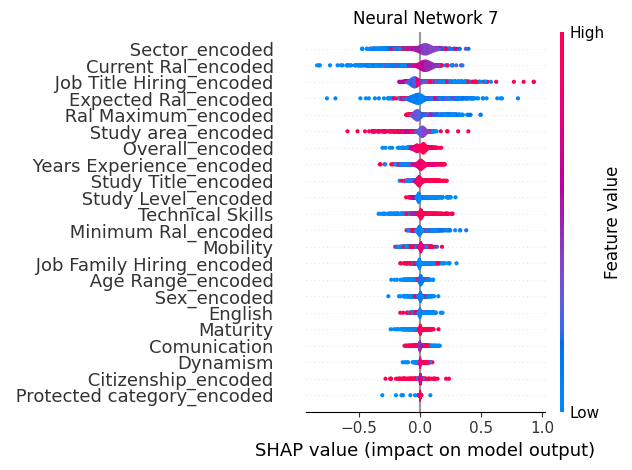

In [83]:
for i in range(5, 12):
    print(i)
    summaryPlot(models[models_list[i]], X_test, tot_columns, plot_type='violin', plot_name=f'Neural Network {i-4}')